# 1 - Entendimento do problema

## O projeto visa indicar qual perfil de investidor é mais adequado com base no comportamento do mercado de bitcoin. 

1.1 - Quais são os perfis de investidores?

- Conservadores, moderados e arrojados.

1.1.2 - Quais a bases fundamentais dos perfis? 

- Segurança
- Liquidez
- Rentabilidade

1.1.3 - Como influenciam no perfil dos investidores?


1.1.4 - Quais são os indicadores de determinantes para a escolha?

#2 - Coleta de dados e referências do projeto

Conjunto de dados utilizado:

 https://www.kaggle.com/mczielinski/bitcoin-historical-data

Referências:

https://www.notion.so/https-towardsdatascience-com-dynamic-cryptocurrency-trading-backtesting-platform-python-219dfcd742-eb894aef1a504d6fb363e3854f870350


# 3 - Análise, interpretação e Visualização 


Bibliotecas utilizadas


In [44]:
#manipulação de dados
import pandas as pd
import numpy as np
from scipy.stats import norm

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [46]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


Primeria inspecção dos dados 


In [47]:
#cinco primeiras observações do dataframe
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Inspecionando o tamanho do dataframe
df.size

38859016

In [49]:
#Inspecionando a forma do df.
df.shape

(4857377, 8)

In [50]:
#Informações iniciais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [51]:
#verificando o tipo dos dados
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [52]:
#obtendo informações estatísticas iniciais. 
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [53]:
#dados faltantes, todas as features com 1243608 dados faltantes.
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [54]:
#mudando a feature timestamp para formato dd/mm/aa
df["Timestamp"]=pd.to_datetime(df["Timestamp"], unit="s")



In [55]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"], format= "%Y-%m-%d")

In [56]:
df["Timestamp"]

0         2011-12-31 07:52:00
1         2011-12-31 07:53:00
2         2011-12-31 07:54:00
3         2011-12-31 07:55:00
4         2011-12-31 07:56:00
                  ...        
4857372   2021-03-30 23:56:00
4857373   2021-03-30 23:57:00
4857374   2021-03-30 23:58:00
4857375   2021-03-30 23:59:00
4857376   2021-03-31 00:00:00
Name: Timestamp, Length: 4857377, dtype: datetime64[ns]

In [57]:
#Tipo do dado foi alterado
df.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

In [108]:
df["Timestamp"].describe

<bound method NDFrame.describe of 0         2011-12-31 07:52:00
1         2011-12-31 07:53:00
2         2011-12-31 07:54:00
3         2011-12-31 07:55:00
4         2011-12-31 07:56:00
                  ...        
4857372   2021-03-30 23:56:00
4857373   2021-03-30 23:57:00
4857374   2021-03-30 23:58:00
4857375   2021-03-30 23:59:00
4857376   2021-03-31 00:00:00
Name: Timestamp, Length: 4857377, dtype: datetime64[ns]>

In [59]:
#correlação entre as features
corr=df.corr()
corr

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999
High,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999
Low,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000
Close,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000
Volume_(BTC),-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887
Volume_(Currency),0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010
Weighted_Price,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

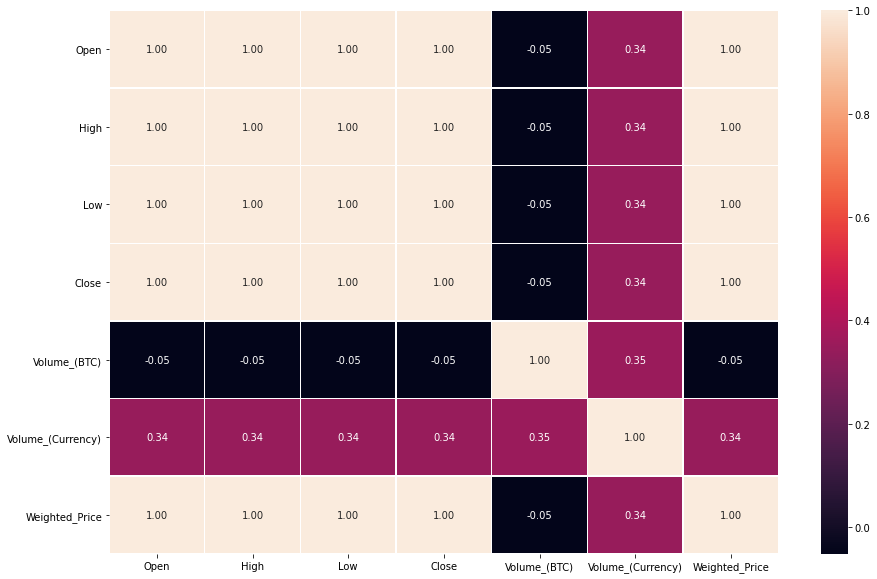

In [60]:
plt.figure(figsize=(15,10))
corr
sns.heatmap(data=corr, annot=True, linewidths=0.5, fmt=".2f",cmap="rocket")
plt.xticks(rotation=0)

#Correlação entre as features.

1 - Timestamp tem grande correlação com as features Close, Low, High e open. Baixa correlação com BTC e Currency. 

2 - Open, high, low e close têm entre si grande correlação. (esperado).

3 - BTC e  CURRENCY têm moderada correlação entre si, baixa com as demais features. 

4 - WEIGHTED PRICE tem alta correlação com as features timestamp, open, high, low e close. E baixa com as fetures BTC E CURRENCY. 





##Dicionário de dados

1 - Timestamp - Hora de início da janela. Janelas de 60s em unidade de time unix. Tipo - int.

2 - Open - Valor de abertura no início da janela. Tipo de dado - float.

3 - High - Valor mais alto durante a janela. Tipo de dado - float.

4 - Low - Valor mais baixo durante a janela. Tipo de dado - float. 

5 - Close - Valor no fechamento da janela. Tipo de dado - float. 

6 - Volume BTC - Volume de bitcoin transacionado na respectiva janela. Tipo de dado - float.

7 - Volume currency - Volume total de cryptomoedas transacionadas na respectiva janela. Tipo de dado - float.

8 - Weighted Price - VWAP - Preço médio ponderado por volume. É obtido da razão entre o somatório do produto do número de bitcoin comprado pelo preço, e o total de bitcoin comprado. Tipo de dado - float.  

#Dados faltantes e duplicatas.

A abordagem adotada com relação aos NaN presentes no conjunto de dados foi de, a princípio, não leva-los em consideração deste ponto em diante. Devido ao fato de serem apenas dados faltantes que não deverão influenciar no presente projeto.


In [61]:
#Cópia do df para exclusão dos faltantes.
df_sem_faltantes= df.copy()

In [62]:
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Excluindo os dados faltantes (NaN)
df_sem_faltantes.dropna(inplace=True)

In [64]:
#Nova forma (tamanho) do dataframe
df_sem_faltantes.shape

(3613769, 8)

In [65]:
#Forma do novo dataframe sem os dados faltantes 
df_sem_faltantes.size

28910152

In [66]:
#Verificando
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [67]:
df_sem_faltantes.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [68]:
#Verificando em todo o dataframe.
df_sem_faltantes.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [69]:
#Verificando para dados duplicados
df_sem_faltantes.duplicated().sum()

0

#Outliers

A estratégia adotada para a detecção de outliers foi a visualização em box plot de uma das features do dataframe (Open). 



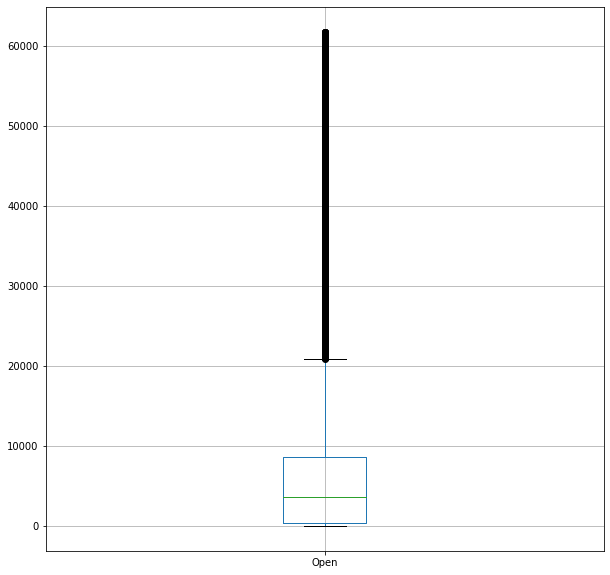

In [70]:
#Verificando a existência de outliers através de visulização em box plot
plt.figure(figsize=[10,10])
boxplot = df_sem_faltantes.boxplot(column=['Open'])



In [71]:
#Calculando intervalo interquartil
q1= df_sem_faltantes["Open"].quantile(0.25)
q3= df_sem_faltantes["Open"].quantile(0.75)
IQL= q3 - q1
print(IQL)

8183.410000000001


In [72]:
#Estabelecendo os limites superior e inferior
LS = q3+1.5*IQL
LI = q1-1.5*IQL
print(LS)
print(LI)

20902.385000000002
-11831.255000000001


In [73]:
#Verificando os pontos de máximo e mínimo das observações
df_sem_faltantes["Open"].describe()

count    3.613769e+06
mean     6.009024e+03
std      8.996247e+03
min      3.800000e+00
25%      4.438600e+02
50%      3.596970e+03
75%      8.627270e+03
max      6.176356e+04
Name: Open, dtype: float64

In [97]:
#Obervações discrepenates com relação ao limite superior calculado
dados_discrepantes = df_sem_faltantes["Open"].loc[df_sem_faltantes["Open"] > 20902.385000000002]

In [107]:
#Dados discrepantes. Existem 149757 observações acima do limite estipulado. 
dados_discrepantes

4707477    20943.53
4707478    20975.79
4707479    20964.91
4707480    20965.45
4707481    20974.48
             ...   
4857372    58714.31
4857373    58683.97
4857374    58693.43
4857375    58742.18
4857376    58767.75
Name: Open, Length: 149757, dtype: float64

#Análise das features

Timestamp:
  Hora de início da janela. Janelas de 60s em unidade de time unix.

In [74]:
df_sem_faltantes["Timestamp"]

0         2011-12-31 07:52:00
478       2011-12-31 15:50:00
547       2011-12-31 16:59:00
548       2011-12-31 17:00:00
1224      2012-01-01 04:16:00
                  ...        
4857372   2021-03-30 23:56:00
4857373   2021-03-30 23:57:00
4857374   2021-03-30 23:58:00
4857375   2021-03-30 23:59:00
4857376   2021-03-31 00:00:00
Name: Timestamp, Length: 3613769, dtype: datetime64[ns]

In [75]:
#Verificando o tipo
df_sem_faltantes["Timestamp"].dtypes

dtype('<M8[ns]')

In [76]:
#Verificando dados faltantes
df_sem_faltantes["Timestamp"].isnull().sum()

0

In [109]:
#Informações estátisticas sobre a feature
df_sem_faltantes["Timestamp"].describe

<bound method NDFrame.describe of 0         2011-12-31 07:52:00
478       2011-12-31 15:50:00
547       2011-12-31 16:59:00
548       2011-12-31 17:00:00
1224      2012-01-01 04:16:00
                  ...        
4857372   2021-03-30 23:56:00
4857373   2021-03-30 23:57:00
4857374   2021-03-30 23:58:00
4857375   2021-03-30 23:59:00
4857376   2021-03-31 00:00:00
Name: Timestamp, Length: 3613769, dtype: datetime64[ns]>

#Open

Valor de abertura da janela. 


In [78]:
df_sem_faltantes["Open"]

0              4.39
478            4.39
547            4.50
548            4.58
1224           4.58
             ...   
4857372    58714.31
4857373    58683.97
4857374    58693.43
4857375    58742.18
4857376    58767.75
Name: Open, Length: 3613769, dtype: float64

In [79]:
#Informações estatísticas iniciais
df_sem_faltantes["Open"].describe()

count    3.613769e+06
mean     6.009024e+03
std      8.996247e+03
min      3.800000e+00
25%      4.438600e+02
50%      3.596970e+03
75%      8.627270e+03
max      6.176356e+04
Name: Open, dtype: float64

In [110]:
#Mediana
df_sem_faltantes["Open"].median()

3596.97

In [80]:
#Verificando para dados faltantes 
df_sem_faltantes["Open"].isnull().sum()

0

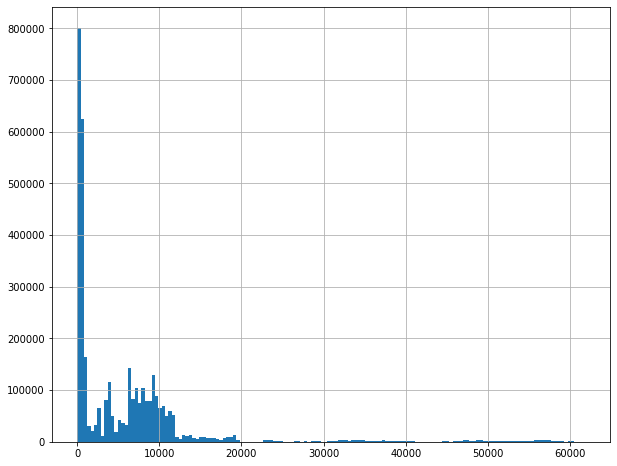

In [81]:
df_sem_faltantes["Open"].hist(bins=150, figsize=(10,8))

In [82]:
#Verificando a curtose da distribuição 
df_sem_faltantes["Open"].kurtosis()

14.07871706680082

In [83]:
#Verificando a simetria da distribuição 
df_sem_faltantes["Open"].skew()

3.3966402034564127

In [84]:
x_list=np.linspace(df_sem_faltantes.Open.min(),df_sem_faltantes.Open.max(), 100)
y_list=norm.pdf(x_list,loc=df_sem_faltantes.Open.mean(), scale=df_sem_faltantes.Open.std())

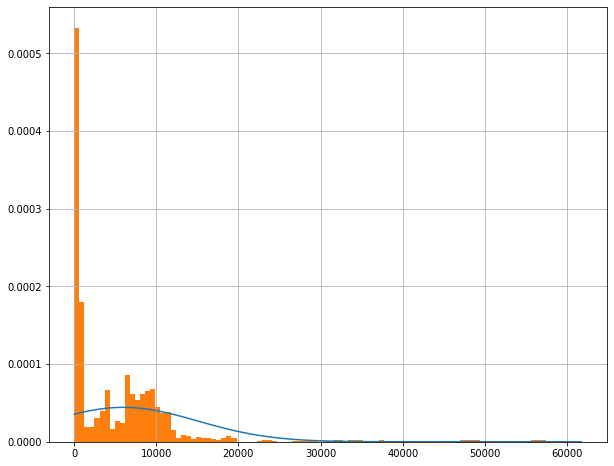

In [85]:
plt.plot(x_list,y_list)
df_sem_faltantes["Open"].hist(bins=100, figsize=(10,8), density=True)


